## Ejemplo de Clustering

K-medias es un método de agrupamiento, que tiene como objetivo la partición de un conjunto de n observaciones en k grupos en el que cada observación pertenece al grupo cuyo valor medio es más cercano. Es un método utilizado en minería de datos.

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [46]:
df_customers = pd.read_csv('C:/Users/raul/Documents/Data_Science_Master/Machine Learning/documentos-ML-material/05.Clustering/Mall_Customers.csv')

In [47]:
df_customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [48]:
df_customers.shape

(200, 5)

In [49]:
df_customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [50]:
df_customers.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [51]:
df_customers.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [52]:
df_customers

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [53]:
## Vamos a hacer una agrupación de los usuarios entorno a las variables Annual Income y Spending Score
X = df_customers.iloc[:, [3, 4]].values

### Calculamos el número de clusters mínimos que necesitamos

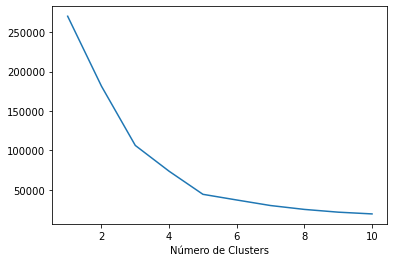

In [54]:
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
plt.plot(range(1, 11), sse)
plt.xlabel('Número de Clusters')
plt.show()

El grafico superior representa las variancias dentro del cluster. Decrece cuando la cantidad de clusters (k) se incremente, 

The plot above represents the variance within the clusters. It decreases as k increases, pero se puede ver un quibre (o "codo") en k = 5. Esta curva indica que los grupos adicionales más allá del cuarto tienen poco valor. En la siguiente sección, clasificaremos las observaciones en 5 grupos.

### Realizamos el cálculo con el método K-means

Por el grafico anterior el punto de corte parecería estar en 5 cluster.

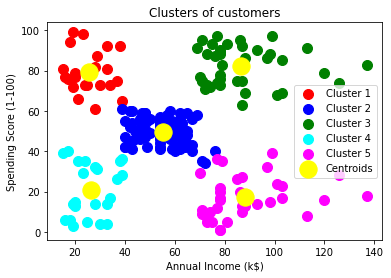

In [55]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
# Cada uno de los cluster:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
# Centroide por cluster:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
# Margenes
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

En resume este scri`t muestra como realizar un cluster de compradores teniendo en cuenta sus caracteristicas. Annual Income y Spending Score


Si quisiera ver algun cluster en particular, como por ejemplo Cluster1:

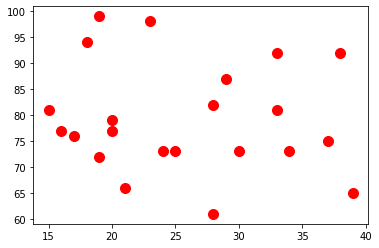

In [56]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')

In [57]:
y_kmeans


array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [58]:
df_customers['kmeans'] = y_kmeans + 1

In [59]:
df_customers 

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),kmeans
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,4
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,3
196,197,Female,45,126,28,5
197,198,Male,32,126,74,3
198,199,Male,32,137,18,5


In [60]:
df_customers_1 = df_customers[df_customers['kmeans']==1]
df_customers_1

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),kmeans
1,2,Male,21,15,81,1
3,4,Female,23,16,77,1
5,6,Female,22,17,76,1
7,8,Female,23,18,94,1
9,10,Female,30,19,72,1
11,12,Female,35,19,99,1
13,14,Female,24,20,77,1
15,16,Male,22,20,79,1
17,18,Male,20,21,66,1
19,20,Female,35,23,98,1


Algunas medidas de resumen

In [61]:
Promedio_df_customers_1=df_customers_1.mean()
Promedio_df_customers_1

CustomerID                23.090909
Age                       25.272727
Annual Income (k$)        25.727273
Spending Score (1-100)    79.363636
kmeans                     1.000000
dtype: float64

In [62]:
maximos_df_customers_1=df_customers_1.max()
maximos_df_customers_1

CustomerID                  46
Genre                     Male
Age                         35
Annual Income (k$)          39
Spending Score (1-100)      99
kmeans                       1
dtype: object

In [63]:
minimos_df_customers_1=df_customers_1.min()
minimos_df_customers_1

CustomerID                     2
Genre                     Female
Age                           18
Annual Income (k$)            15
Spending Score (1-100)        61
kmeans                         1
dtype: object

Si quisieramos saber la comparación de gasto por género:

In [68]:
import seaborn as sns

<AxesSubplot:xlabel='Genre', ylabel='Spending Score (1-100)'>

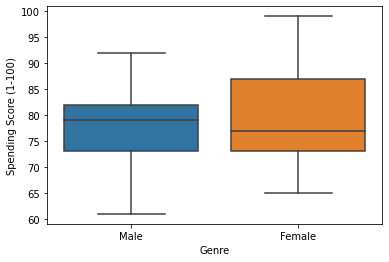

In [75]:
sns.boxplot(y='Spending Score (1-100)', x='Genre', data=df_customers_1)